In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc

import random

file_path = '../data/kbobattingdata.csv'
kbo = pd.read_csv(file_path)

In [23]:
kbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                323 non-null    int64  
 1   team                323 non-null    object 
 2   average_batter_age  323 non-null    float64
 3   runs_per_game       323 non-null    float64
 4   games               323 non-null    int64  
 5   plate_appearances   323 non-null    int64  
 6   at_bats             323 non-null    int64  
 7   runs                323 non-null    int64  
 8   hits                323 non-null    int64  
 9   doubles             323 non-null    int64  
 10  triples             323 non-null    int64  
 11  homeruns            323 non-null    int64  
 12  RBI                 323 non-null    int64  
 13  stolen_bases        184 non-null    float64
 14  caught_stealing     184 non-null    float64
 15  bases_on_balls      323 non-null    int64  
 16  strikeou

In [15]:
kbo.head(10)

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
0,2021,SSG Landers,30.9,5.26,143,5698,4864,752,1268,203,...,0.261,0.354,0.421,0.775,2049,104,93,55,52,23.0
1,2021,Doosan Bears,29.0,5.13,143,5606,4867,733,1306,234,...,0.268,0.350,0.391,0.741,1901,137,86,45,52,12.0
2,2021,Lotte Giants,29.0,5.06,143,5689,4978,723,1384,263,...,0.278,0.356,0.399,0.755,1985,114,53,37,45,18.0
3,2021,Kiwoom Heroes,27.1,5.01,143,5610,4839,716,1250,243,...,0.258,0.347,0.376,0.722,1819,92,93,34,55,17.0
4,2021,KT Wiz,29.4,4.97,143,5581,4773,711,1263,217,...,0.265,0.356,0.380,0.736,1814,105,58,68,43,27.0
5,2021,Samsung Lions,30.0,4.90,143,5505,4798,701,1280,203,...,0.267,0.343,0.398,0.741,1907,98,55,47,67,21.0
6,2021,NC Dinos,29.0,4.87,143,5492,4772,697,1244,202,...,0.261,0.343,0.416,0.759,1984,92,111,59,43,14.0
7,2021,LG Twins,28.4,4.56,143,5496,4721,652,1185,208,...,0.251,0.342,0.369,0.711,1742,102,93,51,45,16.0
8,2021,Hanwha Eagles,25.6,4.17,143,5460,4651,596,1104,211,...,0.237,0.335,0.342,0.676,1589,110,74,54,49,14.0
9,2021,Kia Tigers,27.9,3.97,143,5546,4800,567,1193,183,...,0.249,0.338,0.336,0.674,1613,118,73,41,37,16.0


In [16]:
kbo.tail(10)

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
313,1983,OB Bears,25.5,4.18,100,3766,3330,418,863,141,...,0.259,0.324,0.362,0.686,1206,63,50,84,23,NaN
314,1983,MBC Blue Dragons,27.9,3.98,100,3607,3177,398,821,143,...,0.258,0.326,0.359,0.685,1141,51,57,68,31,NaN
315,1983,Lotte Giants,26.0,3.61,100,3615,3192,361,789,127,...,0.247,0.318,0.371,0.689,1183,68,40,55,24,NaN
316,1983,Sammi Superstars,26.3,3.45,100,3737,3317,345,814,113,...,0.245,0.312,0.344,0.656,1141,76,47,73,18,NaN
317,1982,Samsung Lions,25.8,5.31,80,3040,2649,425,705,126,...,0.266,0.347,0.392,0.739,1038,50,30,36,18,NaN
318,1982,MBC Blue Dragons,28.1,5.24,80,3060,2686,419,757,124,...,0.282,0.354,0.410,0.764,1100,56,47,32,27,NaN
319,1982,OB Bears,24.6,4.99,80,3097,2745,399,778,137,...,0.283,0.349,0.412,0.762,1132,36,41,46,18,NaN
320,1982,Haitai Tigers,24.8,4.68,80,2990,2665,374,696,110,...,0.261,0.328,0.408,0.736,1086,59,41,28,21,NaN
321,1982,Lotte Giants,26.4,4.41,80,3062,2628,353,674,112,...,0.257,0.344,0.373,0.717,979,61,40,41,27,NaN
322,1982,Sammi Superstars,24.3,3.78,80,2953,2653,302,637,117,...,0.240,0.304,0.345,0.648,914,44,29,31,19,NaN


In [17]:
kbo.isnull().sum()

year                    0
team                    0
average_batter_age      0
runs_per_game           0
games                   0
plate_appearances       0
at_bats                 0
runs                    0
hits                    0
doubles                 0
triples                 0
homeruns                0
RBI                     0
stolen_bases          139
caught_stealing       139
bases_on_balls          0
strikeouts              0
batting_average         0
OBP                     0
SLG                     0
OPS                     0
total_bases             0
GDP                     0
HBP                     0
sacrifice_hits          0
sacrifice_flies         0
IBB                   139
dtype: int64

In [97]:
kbo_corr = kbo[['average_batter_age','stolen_bases']].corr(method = 'pearson')

print(kbo_corr)

                    average_batter_age  stolen_bases
average_batter_age            1.000000     -0.216677
stolen_bases                 -0.216677      1.000000


In [103]:
kbo_corr_2 = kbo[['homeruns','strikeouts']].corr(method = 'pearson')

print(kbo_corr_2)

            homeruns  strikeouts
homeruns    1.000000    0.619601
strikeouts  0.619601    1.000000


In [105]:
kbo_corr_3 = kbo[['homeruns','OPS']].corr(method = 'pearson')

print(kbo_corr_3)

          homeruns       OPS
homeruns  1.000000  0.853596
OPS       0.853596  1.000000


In [27]:
kbo_2021 = kbo.loc[(kbo['year'] == 2021)]

kbo_2021

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
0,2021,SSG Landers,30.9,5.26,143,5698,4864,752,1268,203,...,0.261,0.354,0.421,0.775,2049,104,93,55,52,23.0
1,2021,Doosan Bears,29.0,5.13,143,5606,4867,733,1306,234,...,0.268,0.350,0.391,0.741,1901,137,86,45,52,12.0
2,2021,Lotte Giants,29.0,5.06,143,5689,4978,723,1384,263,...,0.278,0.356,0.399,0.755,1985,114,53,37,45,18.0
3,2021,Kiwoom Heroes,27.1,5.01,143,5610,4839,716,1250,243,...,0.258,0.347,0.376,0.722,1819,92,93,34,55,17.0
4,2021,KT Wiz,29.4,4.97,143,5581,4773,711,1263,217,...,0.265,0.356,0.380,0.736,1814,105,58,68,43,27.0
5,2021,Samsung Lions,30.0,4.90,143,5505,4798,701,1280,203,...,0.267,0.343,0.398,0.741,1907,98,55,47,67,21.0
6,2021,NC Dinos,29.0,4.87,143,5492,4772,697,1244,202,...,0.261,0.343,0.416,0.759,1984,92,111,59,43,14.0
7,2021,LG Twins,28.4,4.56,143,5496,4721,652,1185,208,...,0.251,0.342,0.369,0.711,1742,102,93,51,45,16.0
8,2021,Hanwha Eagles,25.6,4.17,143,5460,4651,596,1104,211,...,0.237,0.335,0.342,0.676,1589,110,74,54,49,14.0
9,2021,Kia Tigers,27.9,3.97,143,5546,4800,567,1193,183,...,0.249,0.338,0.336,0.674,1613,118,73,41,37,16.0


In [92]:
kbo_2021_stolen = kbo_2021[['team','stolen_bases']]

kbo_2021_stolen['stolen_bases'] = kbo_2021_stolen['stolen_bases'].astype(int)

kbo_2021_stolen

C:\Users\TJ\AppData\Local\Temp\ipykernel_2064\433097953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kbo_2021_stolen['stolen_bases'] = kbo_2021_stolen['stolen_bases'].astype(int)


,team,stolen_bases
0,SSG Landers,100
1,Doosan Bears,81
2,Lotte Giants,60
3,Kiwoom Heroes,97
4,KT Wiz,112
5,Samsung Lions,116
6,NC Dinos,101
7,LG Twins,92
8,Hanwha Eagles,109
9,Kia Tigers,73


In [93]:
kbo_2021_age = kbo_2021[['team','average_batter_age']]

kbo_2021_age

,team,average_batter_age
0,SSG Landers,30.9
1,Doosan Bears,29.0
2,Lotte Giants,29.0
3,Kiwoom Heroes,27.1
4,KT Wiz,29.4
5,Samsung Lions,30.0
6,NC Dinos,29.0
7,LG Twins,28.4
8,Hanwha Eagles,25.6
9,Kia Tigers,27.9


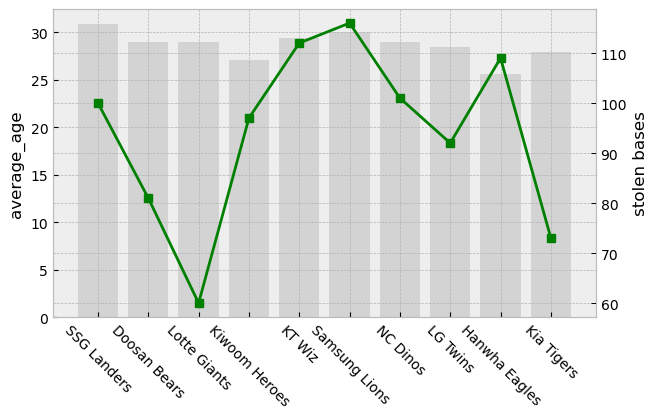

In [94]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (7,4)

x = kbo_2021['team']

y1 = kbo_2021_stolen['stolen_bases']
y2 = kbo_2021_age['average_batter_age']

fig, ax1 = plt.subplots()

plt.xticks(rotation = -45)
ax1.bar(x, y2, color = 'lightgray')
ax1.tick_params(axis = 'y', direction = 'in')
ax1.set_ylabel('average_age')

ax2 = ax1.twinx()

ax2.plot(x, y1, '-s', color = 'green')
ax2.set_ylabel('stolen bases')
ax2.tick_params(axis = 'both', direction = 'in', width = 0.7)

plt.show()